In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('precision', 3)

In [3]:
data = pd.read_csv('xAPI-Edu-Data.csv', sep = ',', engine = 'python')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


In [5]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [6]:
data.rename(columns={'gender': 'Gender', 'NationalITy': 'Nationality', 'PlaceofBirth': 'PlaceOfBirth', 
                     'raisedhands': 'RaisedHands', 'VisITedResources': 'VisitedResources',
                    'ParentschoolSatisfaction': 'ParentSchoolSatisfaction'}, inplace=True)

In [7]:
data.tail()

,Gender,Nationality,PlaceOfBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


In [8]:
print(data.shape)
print(data.columns)

(480, 17)
Index(['Gender', 'Nationality', 'PlaceOfBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'RaisedHands',
       'VisitedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentSchoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


In [9]:
data.describe()

,RaisedHands,VisitedResources,AnnouncementsView,Discussion
count,480.000,480.000,480.000,480.000
mean,46.775,54.798,37.919,43.283
std,30.779,33.080,26.611,27.638
min,0.000,0.000,0.000,1.000
25%,15.750,20.000,14.000,20.000
50%,50.000,65.000,33.000,39.000
75%,75.000,84.000,58.000,70.000
max,100.000,99.000,98.000,99.000


In [10]:
data.describe(include = ['object'])

,Gender,Nationality,PlaceOfBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


In [11]:
data.describe(exclude = ['object'])

,RaisedHands,VisitedResources,AnnouncementsView,Discussion
count,480.000,480.000,480.000,480.000
mean,46.775,54.798,37.919,43.283
std,30.779,33.080,26.611,27.638
min,0.000,0.000,0.000,1.000
25%,15.750,20.000,14.000,20.000
50%,50.000,65.000,33.000,39.000
75%,75.000,84.000,58.000,70.000
max,100.000,99.000,98.000,99.000


# Готовим данные

In [12]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Gender', 'Nationality', 'PlaceOfBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentSchoolSatisfaction', 'StudentAbsenceDays', 'Class']
['RaisedHands', 'VisitedResources', 'AnnouncementsView', 'Discussion']


In [13]:
for c in categorical_columns:
    print("{0}: {1}".format(c, data[c].unique()))

Gender: ['M' 'F']
Nationality: ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
PlaceOfBirth: ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
StageID: ['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID: ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID: ['A' 'B' 'C']
Topic: ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester: ['F' 'S']
Relation: ['Father' 'Mum']
ParentAnsweringSurvey: ['Yes' 'No']
ParentSchoolSatisfaction: ['Good' 'Bad']
StudentAbsenceDays: ['Under-7' 'Above-7']
Class: ['M' 'L' 'H']


In [14]:
data['Nationality'].replace(to_replace = {'KW': 'Kuwait', 'lebanon': 'Lebanon', 'venzuela': 'Venezuela', 'Lybia': 'Libya'}, 
                            inplace=True)
data['PlaceOfBirth'].replace(to_replace = {'KuwaIT': 'Kuwait', 'lebanon': 'Lebanon', 'venzuela': 'Venezuela', 'Lybia': 'Libya'}, 
                             inplace=True)
data['StageID'].replace(to_replace = {'lowerlevel': 'Lowerlevel'}, inplace=True)
data['Relation'].replace(to_replace = {'Mum': 'Mother'}, inplace=True)

In [15]:
for c in categorical_columns:
    print("{0}: {1}".format(c, data[c].unique()))

Gender: ['M' 'F']
Nationality: ['Kuwait' 'Lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Venezuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Libya']
PlaceOfBirth: ['Kuwait' 'Lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Venezuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Libya']
StageID: ['Lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID: ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID: ['A' 'B' 'C']
Topic: ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester: ['F' 'S']
Relation: ['Father' 'Mother']
ParentAnsweringSurvey: ['Yes' 'No']
ParentSchoolSatisfaction: ['Good' 'Bad']
StudentAbsenceDays: ['Under-7' 'Above-7']
Class: ['M' 'L' 'H']


Проверим, есть ли пропущенные значения

In [16]:
print(data.isnull().values.sum()) # number of NaN-values in the dataset

0


In [17]:
data[categorical_columns].count(axis = 0)

Gender                      480
Nationality                 480
PlaceOfBirth                480
StageID                     480
GradeID                     480
SectionID                   480
Topic                       480
Semester                    480
Relation                    480
ParentAnsweringSurvey       480
ParentSchoolSatisfaction    480
StudentAbsenceDays          480
Class                       480
dtype: int64

In [18]:
data[numerical_columns].count(axis = 0)

RaisedHands          480
VisitedResources     480
AnnouncementsView    480
Discussion           480
dtype: int64

## Векторизация

In [19]:
binary_columns    = [c for c in categorical_columns if len(data[c].unique()) == 2]
nonbinary_columns = [c for c in categorical_columns if len(data[c].unique()) > 2]
print(binary_columns)
print(nonbinary_columns)

['Gender', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentSchoolSatisfaction', 'StudentAbsenceDays']
['Nationality', 'PlaceOfBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Class']


In [20]:
data.at[data['Gender'] == 'F', 'Gender'] = 0
data.at[data['Gender'] == 'M', 'Gender'] = 1

In [21]:
data['Gender'].describe()

count     480
unique      2
top         1
freq      305
Name: Gender, dtype: int64

In [22]:
data.at[data['Semester'] == 'F', 'Semester'] = 0
data.at[data['Semester'] == 'S', 'Semester'] = 1

In [23]:
data['Semester'].describe()

count     480
unique      2
top         0
freq      245
Name: Semester, dtype: int64

In [24]:
data.at[data['Relation'] == 'Mother', 'Relation'] = 0
data.at[data['Relation'] == 'Father', 'Relation'] = 1

In [25]:
data['Relation'].describe()

count     480
unique      2
top         1
freq      283
Name: Relation, dtype: int64

In [26]:
data.at[data['ParentAnsweringSurvey'] == 'No', 'ParentAnsweringSurvey'] = 0
data.at[data['ParentAnsweringSurvey'] == 'Yes', 'ParentAnsweringSurvey'] = 1

In [27]:
data['ParentAnsweringSurvey'].describe()

count     480
unique      2
top         1
freq      270
Name: ParentAnsweringSurvey, dtype: int64

In [28]:
data.at[data['ParentSchoolSatisfaction'] == 'Bad', 'ParentSchoolSatisfaction'] = 0
data.at[data['ParentSchoolSatisfaction'] == 'Good', 'ParentSchoolSatisfaction'] = 1

In [29]:
data['ParentSchoolSatisfaction'].describe()

count     480
unique      2
top         1
freq      292
Name: ParentSchoolSatisfaction, dtype: int64

In [30]:
data.at[data['StudentAbsenceDays'] == 'Under-7', 'StudentAbsenceDays'] = 0
data.at[data['StudentAbsenceDays'] == 'Above-7', 'StudentAbsenceDays'] = 1

In [31]:
data['StudentAbsenceDays'].describe()

count     480
unique      2
top         0
freq      289
Name: StudentAbsenceDays, dtype: int64

In [32]:
data['StudentAbsenceDays'].unique()

array([0, 1], dtype=object)

Векторизация

In [33]:
print(nonbinary_columns)

['Nationality', 'PlaceOfBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Class']


In [34]:
nonbinary_columns.remove('Class')

In [35]:
class_column = data['Class']

In [36]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Nationality_Egypt', 'Nationality_Iran', 'Nationality_Iraq',
       'Nationality_Jordan', 'Nationality_Kuwait', 'Nationality_Lebanon',
       'Nationality_Libya', 'Nationality_Morocco', 'Nationality_Palestine',
       'Nationality_SaudiArabia', 'Nationality_Syria', 'Nationality_Tunis',
       'Nationality_USA', 'Nationality_Venezuela', 'PlaceOfBirth_Egypt',
       'PlaceOfBirth_Iran', 'PlaceOfBirth_Iraq', 'PlaceOfBirth_Jordan',
       'PlaceOfBirth_Kuwait', 'PlaceOfBirth_Lebanon', 'PlaceOfBirth_Libya',
       'PlaceOfBirth_Morocco', 'PlaceOfBirth_Palestine',
       'PlaceOfBirth_SaudiArabia', 'PlaceOfBirth_Syria', 'PlaceOfBirth_Tunis',
       'PlaceOfBirth_USA', 'PlaceOfBirth_Venezuela', 'StageID_HighSchool',
       'StageID_Lowerlevel', 'StageID_MiddleSchool', 'GradeID_G-02',
       'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06', 'GradeID_G-07',
       'GradeID_G-08', 'GradeID_G-09', 'GradeID_G-10', 'GradeID_G-11',
       'GradeID_G-12', 'SectionID_A', 'SectionID_B', 'SectionID

## Нормализация количественных признаков

In [37]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,RaisedHands,VisitedResources,AnnouncementsView,Discussion
count,480.000,480.000,480.000,480.000
mean,46.775,54.798,37.919,43.283
std,30.779,33.080,26.611,27.638
min,0.000,0.000,0.000,1.000
25%,15.750,20.000,14.000,20.000
50%,50.000,65.000,33.000,39.000
75%,75.000,84.000,58.000,70.000
max,100.000,99.000,98.000,99.000


In [38]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0)) / data_numerical.std(axis = 0)

In [39]:
data_numerical.describe()

,RaisedHands,VisitedResources,AnnouncementsView,Discussion
count,4.800e+02,4.800e+02,4.800e+02,4.800e+02
mean,1.488e-16,-1.943e-17,8.465e-17,2.197e-17
std,1.000e+00,1.000e+00,1.000e+00,1.000e+00
min,-1.520e+00,-1.657e+00,-1.425e+00,-1.530e+00
25%,-1.008e+00,-1.052e+00,-8.988e-01,-8.424e-01
50%,1.048e-01,3.084e-01,-1.848e-01,-1.550e-01
75%,9.170e-01,8.828e-01,7.546e-01,9.667e-01
max,1.729e+00,1.336e+00,2.258e+00,2.016e+00


## Соединяем все в одну таблицу

In [40]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(480, 66)


In [41]:
data.describe()

,RaisedHands,VisitedResources,AnnouncementsView,Discussion,Nationality_Egypt,Nationality_Iran,Nationality_Iraq,Nationality_Jordan,Nationality_Kuwait,Nationality_Lebanon,...,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish
count,4.800e+02,4.800e+02,4.800e+02,4.800e+02,480.000,480.000,480.000,480.000,480.000,480.000,...,480.000,480.000,480.000,480.000,480.000,480.000,480.000,480.000,480.000,480.000
mean,1.488e-16,-1.943e-17,8.465e-17,2.197e-17,0.019,0.013,0.046,0.358,0.373,0.035,...,0.050,0.094,0.135,0.050,0.040,0.198,0.044,0.046,0.106,0.052
std,1.000e+00,1.000e+00,1.000e+00,1.000e+00,0.136,0.111,0.209,0.480,0.484,0.185,...,0.218,0.292,0.343,0.218,0.195,0.399,0.205,0.209,0.308,0.222
min,-1.520e+00,-1.657e+00,-1.425e+00,-1.530e+00,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-1.008e+00,-1.052e+00,-8.988e-01,-8.424e-01,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.048e-01,3.084e-01,-1.848e-01,-1.550e-01,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,9.170e-01,8.828e-01,7.546e-01,9.667e-01,0.000,0.000,0.000,1.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.729e+00,1.336e+00,2.258e+00,2.016e+00,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


# X и y

In [43]:
X = data
y = class_column
feature_names = X.columns

In [44]:
feature_names

Index(['RaisedHands', 'VisitedResources', 'AnnouncementsView', 'Discussion',
       'Nationality_Egypt', 'Nationality_Iran', 'Nationality_Iraq',
       'Nationality_Jordan', 'Nationality_Kuwait', 'Nationality_Lebanon',
       'Nationality_Libya', 'Nationality_Morocco', 'Nationality_Palestine',
       'Nationality_SaudiArabia', 'Nationality_Syria', 'Nationality_Tunis',
       'Nationality_USA', 'Nationality_Venezuela', 'PlaceOfBirth_Egypt',
       'PlaceOfBirth_Iran', 'PlaceOfBirth_Iraq', 'PlaceOfBirth_Jordan',
       'PlaceOfBirth_Kuwait', 'PlaceOfBirth_Lebanon', 'PlaceOfBirth_Libya',
       'PlaceOfBirth_Morocco', 'PlaceOfBirth_Palestine',
       'PlaceOfBirth_SaudiArabia', 'PlaceOfBirth_Syria', 'PlaceOfBirth_Tunis',
       'PlaceOfBirth_USA', 'PlaceOfBirth_Venezuela', 'StageID_HighSchool',
       'StageID_Lowerlevel', 'StageID_MiddleSchool', 'GradeID_G-02',
       'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06', 'GradeID_G-07',
       'GradeID_G-08', 'GradeID_G-09', 'GradeID_G-10', 'G

In [45]:
print(X.shape)
print(y.shape)
N, d = X.shape

(480, 66)
(480,)


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

384 96


# $k$NN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.213541666667 0.375


In [49]:
err_test = 1 - knn.score(X_test, y_test)

In [50]:
err_test

0.375

In [51]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[26  0 15]
 [ 0 18  1]
 [ 9 11 16]]


### Подбор параметров

In [52]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': range(1, 20)}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.309895833333 19


In [53]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.2734375 0.4375


# SVC

In [54]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.197916666667 0.3125


### Подбор параметров

In [55]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

C:\Users\Nikita\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Nikita\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.21614583333333337 100.0


In [56]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.2734375 0.4375


# Random Forest

In [57]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.1875


### Значимость признаков

In [58]:
np.sum(rf.feature_importances_)

1.0000000000000004

In [60]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'VisitedResources' (0.144110)
 2. feature 'RaisedHands' (0.133306)
 3. feature 'AnnouncementsView' (0.116134)
 4. feature 'StudentAbsenceDays' (0.102301)
 5. feature 'Discussion' (0.082272)
 6. feature 'Relation' (0.040709)
 7. feature 'ParentAnsweringSurvey' (0.040218)
 8. feature 'ParentSchoolSatisfaction' (0.025692)
 9. feature 'Gender' (0.025597)
10. feature 'PlaceOfBirth_Jordan' (0.014000)
11. feature 'SectionID_B' (0.011954)
12. feature 'SectionID_A' (0.011487)
13. feature 'Semester' (0.011252)
14. feature 'PlaceOfBirth_Kuwait' (0.011246)
15. feature 'Nationality_Kuwait' (0.011219)
16. feature 'Topic_IT' (0.010865)
17. feature 'Nationality_Jordan' (0.010761)
18. feature 'GradeID_G-02' (0.009862)
19. feature 'StageID_Lowerlevel' (0.009778)
20. feature 'StageID_MiddleSchool' (0.009329)
21. feature 'Topic_Arabic' (0.009043)
22. feature 'GradeID_G-08' (0.008914)
23. feature 'GradeID_G-07' (0.007595)
24. feature 'Topic_French' (0.006801)
25. feature 'Grade

(-1, 20)

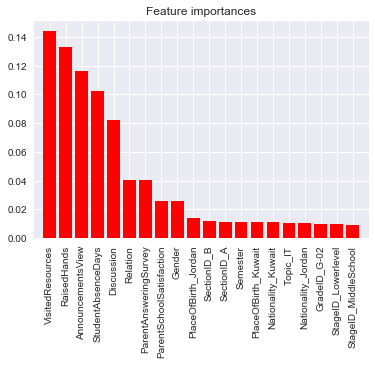

In [61]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

# Extremely Randomized Trees

In [62]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.197916666667


# AdaBoost

In [63]:
ada = ensemble.AdaBoostClassifier(n_estimators = 10)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.278645833333 0.25


# GBT

In [64]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.00520833333333 0.260416666667
